# TP 1 Properatti: 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [4]:
data_url = "../Data/properatti.csv"
data = pd.read_csv(data_url, encoding="utf-8")
print("cantidad de filas: " + str(data.shape[0]))
print("cantidad de columnas: " + str(data.shape[1]))

cantidad de filas: 121220
cantidad de columnas: 26


#### Vemos de qué tipo son las variables:

In [5]:
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

#### Analizamos la cantidad de Nulos

In [6]:
data.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

#### Vemos el % de nulos que hay 

In [7]:
data.isnull().sum() / data.shape[0]

Unnamed: 0                    0.000000
operation                     0.000000
property_type                 0.000000
place_name                    0.000190
place_with_parent_names       0.000000
country_name                  0.000000
state_name                    0.000000
geonames_id                   0.154405
lat-lon                       0.425260
lat                           0.425260
lon                           0.425260
price                         0.168372
currency                      0.168380
price_aprox_local_currency    0.168372
price_aprox_usd               0.168372
surface_total_in_m2           0.324435
surface_covered_in_m2         0.164222
price_usd_per_m2              0.433947
price_per_m2                  0.276869
floor                         0.934837
rooms                         0.609058
expenses                      0.882346
properati_url                 0.000000
description                   0.000016
title                         0.000000
image_thumbnail          

El dataset no tiene fechas de publicación lo que impide determinar la cotización del dólar.
Las variables "price", "currency", "price_aprox_local_currency" dejan de tener valor

#### La variable target para el modelo es "price_aprox_usd", para eso, hacemos algunos análisis sobre la misma: 



In [8]:
#nos quedamos con la moneda de USD : 
data1 = data[data['currency'] == 'USD']
data1.shape

(87587, 26)

In [9]:
#validamos que la variable de precio coincida con el precio en dolares 
valores = data1['price'] == data1['price_aprox_usd']
valores.value_counts()

True    87587
dtype: int64

#### Eliminamos los valores nulos de la variable Target. 

In [10]:
#limpiamos los que NaN en el precio
data_clean = data.dropna(axis=0, how='any', subset=['price_aprox_usd'])

In [11]:
#chequeamos que ya tenemos limpio el precio
data_clean.isnull().sum() / data.shape[0]

Unnamed: 0                    0.000000
operation                     0.000000
property_type                 0.000000
place_name                    0.000190
place_with_parent_names       0.000000
country_name                  0.000000
state_name                    0.000000
geonames_id                   0.139845
lat-lon                       0.348639
lat                           0.348639
lon                           0.348639
price                         0.000000
currency                      0.000008
price_aprox_local_currency    0.000000
price_aprox_usd               0.000000
surface_total_in_m2           0.263521
surface_covered_in_m2         0.108480
price_usd_per_m2              0.265575
price_per_m2                  0.108497
floor                         0.774575
rooms                         0.505123
expenses                      0.722356
properati_url                 0.000000
description                   0.000016
title                         0.000000
image_thumbnail          

In [12]:
#Vemos cuantas categorías tenemos por variable 
data_clean.nunique()

Unnamed: 0                    100810
operation                          1
property_type                      4
place_name                       974
place_with_parent_names         1063
country_name                       1
state_name                        28
geonames_id                      569
lat-lon                        39739
lat                            39129
lon                            39152
price                           9746
currency                           4
price_aprox_local_currency     10364
price_aprox_usd                10364
surface_total_in_m2             1538
surface_covered_in_m2            916
price_usd_per_m2               25566
price_per_m2                   25185
floor                            174
rooms                             28
expenses                         949
properati_url                 100810
description                    88392
title                          62765
image_thumbnail                95992
dtype: int64

### Análisis de distribución del DataFrame 

In [20]:
#Por provincia 
mask = data_clean['state_name'].value_counts().head(7).index
data_clean['state_name1'] = data_clean['state_name'].apply(lambda x : x if x in mask else 'otros') 
data_clean['state_name1'].value_counts()

vc_prov = data_clean.state_name1.value_counts() / data.shape[0] 
vc_prov

C:\Users\Jessica\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Capital Federal                 0.239383
Bs.As. G.B.A. Zona Norte        0.198466
Bs.As. G.B.A. Zona Sur          0.099695
Buenos Aires Costa Atlántica    0.074732
Córdoba                         0.074559
Bs.As. G.B.A. Zona Oeste        0.060493
Santa Fe                        0.044654
otros                           0.039647
Name: state_name1, dtype: float64

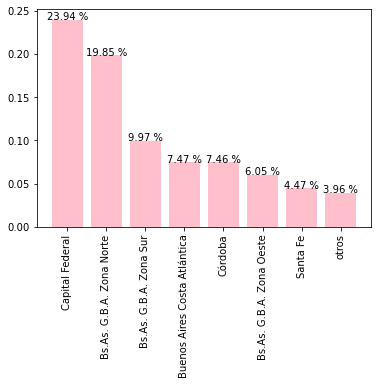

In [21]:
#Genero el plot
f = plt.plot()
ax = plt.bar(x = vc_prov.index, 
             height = vc_prov, 
             color = 'pink')

#Roto los axis del eje x para que se puedan leer.
plt.xticks(rotation = 90)

#Funcion que plotea el % de cada barra
def add_value_label(x_list,y_list):
    for i in range(len(x_list)):
        leyenda = f'{round(y_list[i]*100, 2)} %'
        plt.text(x = i , y = y_list[i], s = leyenda, ha="center")
        
#Llamo a la funcion que plotea los valores de las x
add_value_label(x_list = vc_prov.index, y_list = vc_prov)

#### Se observa que el 80% está distribuido entre Capital Federal, BsAs GBA Zona Norte, BsAs GBA Zona Sur, Costa Atlántica y Córdoba.

In [41]:
vc_type = data_clean.property_type.value_counts() / data.shape[0] 
vc_type

apartment    0.491800
house        0.269881
PH           0.043062
store        0.026885
Name: property_type, dtype: float64

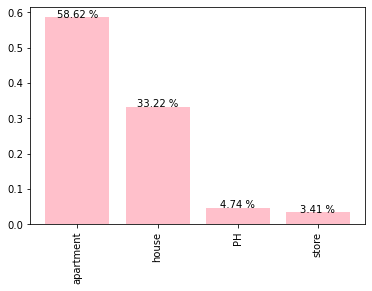

In [171]:
#Genero el plot
f = plt.plot()
ax = plt.bar(x = df.index, 
             height = df, 
             color = 'pink')

#Roto los axis del eje x para que se puedan leer.
plt.xticks(rotation = 90)

#Funcion que plotea el % de cada barra
def add_value_label(x_list,y_list):
    for i in range(len(x_list)):
        leyenda = f'{round(y_list[i]*100, 2)} %'
        plt.text(x = i , y = y_list[i], s = leyenda, ha="center")
        
#Llamo a la funcion que plotea los valores de las x
add_value_label(x_list = vc_type.index, y_list = df)

#### Se observa que el 59% de las propiedades son del tipo depto. 

#### Vemos un describe de la variable Target a ver como esta distribuida para entender los outliers

In [42]:
data_clean.price_aprox_usd.describe()

count    1.008100e+05
mean     2.397006e+05
std      3.913239e+05
min      0.000000e+00
25%      8.973388e+04
50%      1.450000e+05
75%      2.650000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

<AxesSubplot:xlabel='price_aprox_usd', ylabel='Count'>

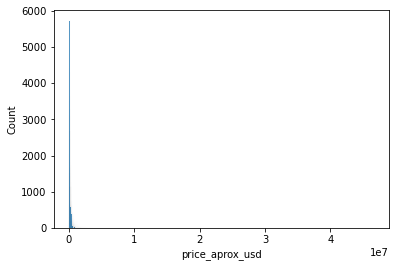

In [43]:
#ploteo para ver que tengo muchos outliers en precio.
sns.histplot(data=data_clean, x='price_aprox_usd')

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price_aprox_usd'>

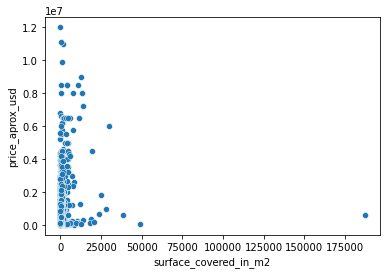

In [44]:
#Tiramos un primer grafico a ver cómo se correlaciona la superficie cubierta en mts2 con el precio. 
sns.scatterplot(x=data_clean['surface_covered_in_m2'], y=data['price_aprox_usd'])

In [45]:
data_clean[['price_aprox_usd', 'surface_total_in_m2']].corr()

,price_aprox_usd,surface_total_in_m2
price_aprox_usd,1.000000,0.301137
surface_total_in_m2,0.301137,1.000000


##### Observamos que nos da una correlación muy baja y que hay mucho ruido, por lo que es necesario aperturar más la correlación en otras variables. 

#### Eliminamos Outliers para las variables que vamos a correlacionar: 

In [46]:
#funcion para borrar outliers.
def borrar_outliers(data, columnas):
    """Solo recibo columnas con valores numericos. 
    Las columnas que quieras borrar outliers van en forma de tupla"""
    cols_limpiar = columnas
    mask=np.ones(shape=(data.shape[0]), dtype=bool)

    for i in cols_limpiar:
        
        #calculamos cuartiles, y valores de corte
        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)
        RSI=Q3-Q1
        max_value=Q3+1.5*RSI
        min_value=Q1-1.5*RSI
        
        #ajusto el min value 
            # No puede ser negativo
            # No puede estar fuera del boxplot para outliers
            # Criterio experto se decide dejar desde el 5% hacia adelante en el precio
            
        min_value=max(data[i].quantile(0.05), min_value, 10)
        
        #filtramos por max y min
        mask=np.logical_and(mask, np.logical_and(data[i]>=min_value, data[i]<=max_value))
    return data[mask]

In [47]:
#Funcion para hacer correlacion.
def check_corr(data, place, tipo, ver_correlacion):
    """Funcion que checkea correlacion entre las variables ver_correlacion.Internamente llama a la funcion borrar_outliers
    
    data: pd.DatFrame
    place: indica filtro por lugar
    tipo indica filtro por tipo de propierdad 
    *ver_correlacion debe ser una tupla con dos columnas del dataframe donde vamos a borrar outliers y calcular correlacion"""
    
    data_place = data[data.place_name==place]
    data_tipo = data_place[data_place.property_type==tipo]

    data_outliers = borrar_outliers(data_tipo, ver_correlacion)
    
    
    corr = data_outliers[[ver_correlacion[0], ver_correlacion[1]]].corr()
    return corr.iloc[0,1]
    

In [48]:
#hacemos las iteraciones para place y para tipo. Elijo arbitrariamente cuanto quiero mostrar. 
#elijo los que tienen mas valores, y despues les paso un index para que solo me muestre el nombre del lugar
iterar_place=data_clean['place_name'].value_counts().head(300)
iterar_place['otro_place']=0
iterar_place = iterar_place.index

iterar_tipo=data_clean['property_type'].value_counts().head(2)
#Esto esta comentado para NO CONTEMPLAR los otros tipos en el calculo
# iterar_tipo['otro_tipo']=0
iterar_tipo = iterar_tipo.index

In [49]:
#todos los valores que no entren en alguna de las categorias recien planteadas, son metidas en "OTROS"
#Modificamos data_clean, pero en nuevas columnas
aux_1 = [x if x in iterar_place else 'otro_place' for x in data_clean['place_name']]
aux_2 = [x if x in iterar_tipo else 'otro_tipo' for x in data_clean['property_type']]

data_clean['place_name_alt'] = aux_1
data_clean['property_type_alt'] = aux_2

C:\Users\Jessica\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jessica\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [50]:
# data_clean.place_name.value_counts()
data_clean.place_name_alt.value_counts()

Córdoba                     6916
Mar del Plata               5966
Rosario                     4735
otro_place                  3478
Tigre                       3038
                            ... 
Luján de Cuyo                 22
Santa-Catalina                22
Loma Hermosa                  22
Albanueva Barrio Cerrado      22
San Miguel del Monte          22
Name: place_name_alt, Length: 301, dtype: int64

### Analizamos si conviene usar superficie cubierta o total: 

In [52]:
#minimo numero de casos para considerar lugar al hacer la correlacion:
min_value_count=100

In [53]:
#Hago un ciclo for: basicamente aplico la funcion CHECK_CORR para cada dato. Todo lo demas es para que quede legible
corr_surf_total=[]
count_tabla_max=10
for tipo in iterar_tipo:
    count_tabla=0
    
    for place in iterar_place:
        
        #Formato para que sea legible (no aporta mucho al calculo)
        spaces= " "*(16-len(place))
        mask_conteo = np.logical_and(data_clean['place_name_alt']==place, data_clean['property_type_alt']==tipo)
        conteo= data_clean[ mask_conteo].shape[0]
        
        #Esta es la importante
        correlacion = round(check_corr(data_clean, place, tipo, ('price_aprox_usd', 'surface_total_in_m2')), 2)
        
       
         #Para descartar valores extremos, no muestro combinaciones con menos de x lugares (arbitrario)
        if conteo > min_value_count:
            corr_surf_total.append(correlacion)
            #Mostrar resultado en forma de tabla. Los primeros valores nada mas
            if count_tabla<=count_tabla_max:
                print(f' Lugar: {place} {spaces} \t // Tipo: {tipo} \t \t //corr: {correlacion} \t // conteo: {conteo}')
                count_tabla+=1
        

 Lugar: Córdoba           	 // Tipo: apartment 	 	 //corr: 0.66 	 // conteo: 4758
 Lugar: Mar del Plata     	 // Tipo: apartment 	 	 //corr: 0.76 	 // conteo: 4181
 Lugar: Rosario           	 // Tipo: apartment 	 	 //corr: 0.73 	 // conteo: 4140
 Lugar: Tigre             	 // Tipo: apartment 	 	 //corr: 0.72 	 // conteo: 1322
 Lugar: Nordelta          	 // Tipo: apartment 	 	 //corr: 0.67 	 // conteo: 1858
 Lugar: Belgrano          	 // Tipo: apartment 	 	 //corr: 0.89 	 // conteo: 2338
 Lugar: Palermo           	 // Tipo: apartment 	 	 //corr: 0.82 	 // conteo: 2258
 Lugar: Caballito         	 // Tipo: apartment 	 	 //corr: 0.87 	 // conteo: 1886
 Lugar: Pilar             	 // Tipo: apartment 	 	 //corr: 0.53 	 // conteo: 746
 Lugar: La Plata          	 // Tipo: apartment 	 	 //corr: 0.74 	 // conteo: 1041
 Lugar: Olivos            	 // Tipo: apartment 	 	 //corr: 0.8 	 // conteo: 1010
 Lugar: Córdoba           	 // Tipo: house 	 	 //corr: 0.48 	 // conteo: 1827
 Lugar: Mar del Plata 

In [54]:
corr_surf_covered=[]
count_tabla_max=10
for tipo in iterar_tipo:
    count_tabla=0
    
    for place in iterar_place:
        
        #Formato para que sea legible (no aporta mucho al calculo)
        spaces= " "*(16-len(place))
        mask_conteo = np.logical_and(data_clean['place_name_alt']==place, data_clean['property_type_alt']==tipo)
        conteo= data_clean[ mask_conteo].shape[0]
        
        #Esta es la importante
        correlacion = round(check_corr(data_clean, place, tipo, ('price_aprox_usd', 'surface_covered_in_m2')), 2)
        
               
        #Para descartar valores extremos, no muestro combinaciones con menos de x lugares (arbitrario)
        if conteo > min_value_count:
            corr_surf_covered.append(correlacion)
            #Mostrar resultado en forma de tabla. Los primeros valores nada mas
            if count_tabla<=count_tabla_max:
                print(f' Lugar: {place} {spaces} \t // Tipo: {tipo} \t \t //corr: {correlacion} \t // conteo: {conteo}')
                count_tabla+=1


 Lugar: Córdoba           	 // Tipo: apartment 	 	 //corr: 0.62 	 // conteo: 4758
 Lugar: Mar del Plata     	 // Tipo: apartment 	 	 //corr: 0.75 	 // conteo: 4181
 Lugar: Rosario           	 // Tipo: apartment 	 	 //corr: 0.77 	 // conteo: 4140
 Lugar: Tigre             	 // Tipo: apartment 	 	 //corr: 0.71 	 // conteo: 1322
 Lugar: Nordelta          	 // Tipo: apartment 	 	 //corr: 0.75 	 // conteo: 1858
 Lugar: Belgrano          	 // Tipo: apartment 	 	 //corr: 0.86 	 // conteo: 2338
 Lugar: Palermo           	 // Tipo: apartment 	 	 //corr: 0.82 	 // conteo: 2258
 Lugar: Caballito         	 // Tipo: apartment 	 	 //corr: 0.87 	 // conteo: 1886
 Lugar: Pilar             	 // Tipo: apartment 	 	 //corr: 0.5 	 // conteo: 746
 Lugar: La Plata          	 // Tipo: apartment 	 	 //corr: 0.74 	 // conteo: 1041
 Lugar: Olivos            	 // Tipo: apartment 	 	 //corr: 0.7 	 // conteo: 1010
 Lugar: Córdoba           	 // Tipo: house 	 	 //corr: 0.76 	 // conteo: 1827
 Lugar: Mar del Plata  

Text(0.5, 1.0, 'Correlacciones usando superficie total. \n PROMEDIO: 0.61')

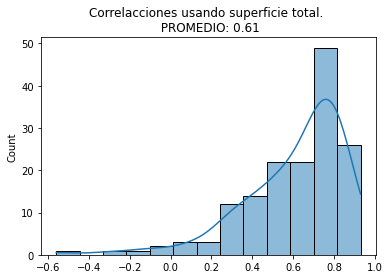

In [59]:
sns.histplot(data=corr_surf_total, kde=True)
plt.title(f'Correlacciones usando superficie total. \n PROMEDIO: {round(pd.Series(corr_surf_total).mean(), 2)}')

Text(0.5, 1.0, 'Correlacciones usando superficie cubierta. \n PROMEDIO: 0.71')

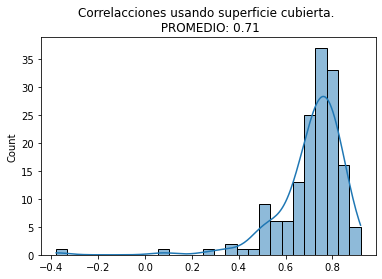

In [60]:
sns.histplot(data=corr_surf_covered,  kde=True)
plt.title(f'Correlacciones usando superficie cubierta. \n PROMEDIO: {round(pd.Series(corr_surf_covered).mean(), 2)}')

#### Conclusión: conviene utilizar la superficie cubierta. La correlación es mayor y además, la misma presenta menos valores nulos. 

#### Graficamos las correlaciones entre precio y superficie cubierta aperturado por property_type_alt y place_name_alt

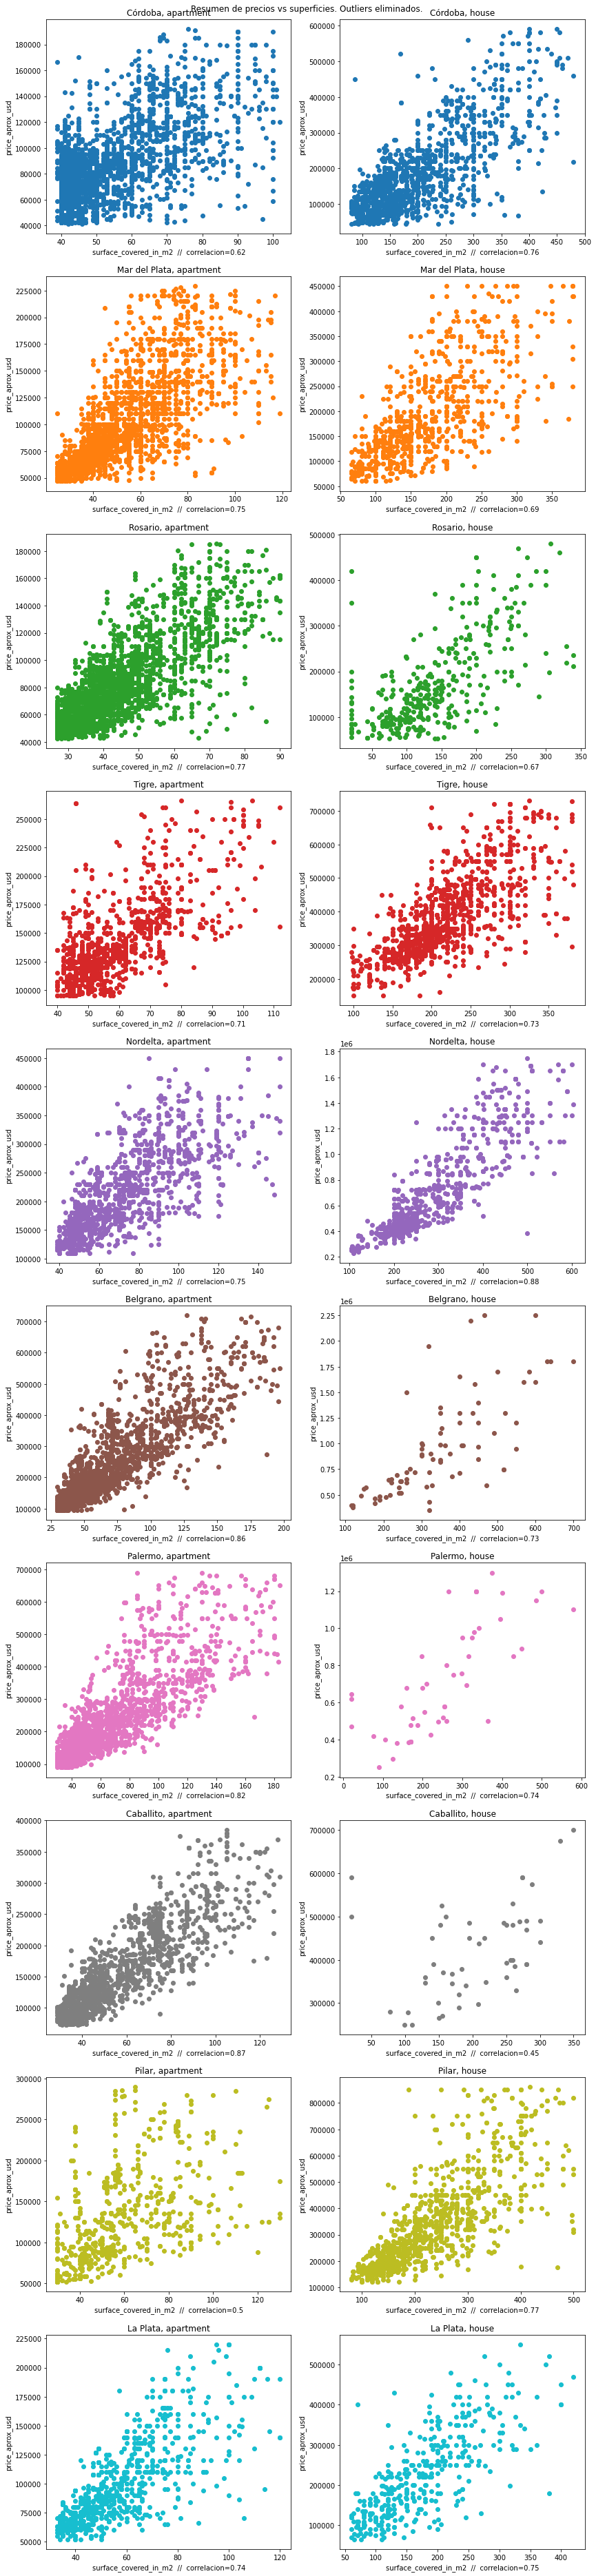

In [61]:
#Vamos a plotear, separando por groupby el data_clean
#levanto el subplot
count_graphs_max=10
len_tipo=len(iterar_tipo)
len_place=min(len(iterar_place), count_graphs_max)
fig, axs = plt.subplots(len_place,len_tipo, figsize=(7*len_tipo,6*len_place), facecolor=(1, 1, 1))

#mapa de colores para que diferenciar por place
color_map=('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4')


#esto es el titulo
fig.suptitle(t="Resumen de precios vs superficies. Outliers eliminados.")

#posicion relativa de los graficos, para que no se vean tan apretados.
fig.subplots_adjust(top=0.975)

#Un "j" para cada tipo
j=0 
for tipo in iterar_tipo:
    
    #Un "j" para cada place
    i=0
    for place in iterar_place:
        if i>=count_graphs_max:
            break
        
        #reducimos para sacar todo lo que no nos sirve.
        data_reducida = data_clean.loc[:, ['place_name_alt', 'price_aprox_usd', 'surface_covered_in_m2', 'property_type_alt']]
        
        #agrupamos la data. filtrando por cada place.
        data_grouped = data_reducida.groupby(by = 'place_name_alt').filter(lambda x: all(x['place_name_alt']==place))

        #volvemos a agrupar la data. filtrando por cada tipo.
        data_grouped = data_grouped.groupby(by = 'property_type_alt').filter(lambda x: all(x['property_type_alt']==tipo))
        
        #aplico el filtro de ouliers para cada grupo
        data_grouped = borrar_outliers(data_grouped, ('price_aprox_usd', 'surface_covered_in_m2'))
        
        #calculo corr para meter en el grafico
        corr_grafico =  data_grouped[['surface_covered_in_m2', 'price_aprox_usd']].corr()
        corr_grafico =  corr_grafico.iloc[0,1]
        corr_grafico = round(corr_grafico, 2)

        #seteo las condiciones para cada axs[i,j]
        axs[i,j].set_title(f'{place}, {tipo}')
        axs[i,j].set_xlabel(f'surface_covered_in_m2  //  correlacion={corr_grafico}')
        axs[i,j].set_ylabel('price_aprox_usd')
        axs[i,j].scatter( x=data_grouped['surface_covered_in_m2'], y=data_grouped['price_aprox_usd'], c=color_map[i%10])

        #vamos al siguiente place. Muevo hacia abajo en el plot
        i+=1

    #vamos a siguiente tipo Muevo hacia la derecha en el plot
    j+=1

#### Creamos variables en funcion a la variable descripción:

Nos proponemos encontrar amenities interesantes como Pileta, Parrilla, Cochera. 

In [62]:
def regex_to_tags(col, reg, match, not_match = np.NaN) :
    u"""Returns a series with 'match' values result of apply the regular expresion to the column
    the 'match' value will be when the regular expression search() method found a match
    the 'not_match' value will be when the regular expression serach() method did not found a match
    col : column where to apply regular expresion
    reg : regular expresion compiled
    """
    
    serie = col.apply(lambda x : x if x is np.NaN else reg.search(x))
    serie = serie.apply(lambda x : match if x is not None else not_match)
   
    return serie

In [63]:
_pattern = 'cochera|garage|auto'
_express = re.compile(_pattern, flags = re.IGNORECASE)

data_clean['cochera'] = regex_to_tags(data_clean['description'], _express, 'si', 'no')


C:\Users\Jessica\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [65]:
_pattern = 'piscina|pileta'
_express = re.compile(_pattern, flags = re.IGNORECASE)

data_clean['pileta'] = regex_to_tags(data_clean['description'], _express, 'si', 'no')


C:\Users\Jessica\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [66]:
_pattern = 'parrilla'
_express = re.compile(_pattern, flags = re.IGNORECASE)

data_clean['parrilla'] = regex_to_tags(data_clean['description'], _express, 'si', 'no')


C:\Users\Jessica\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


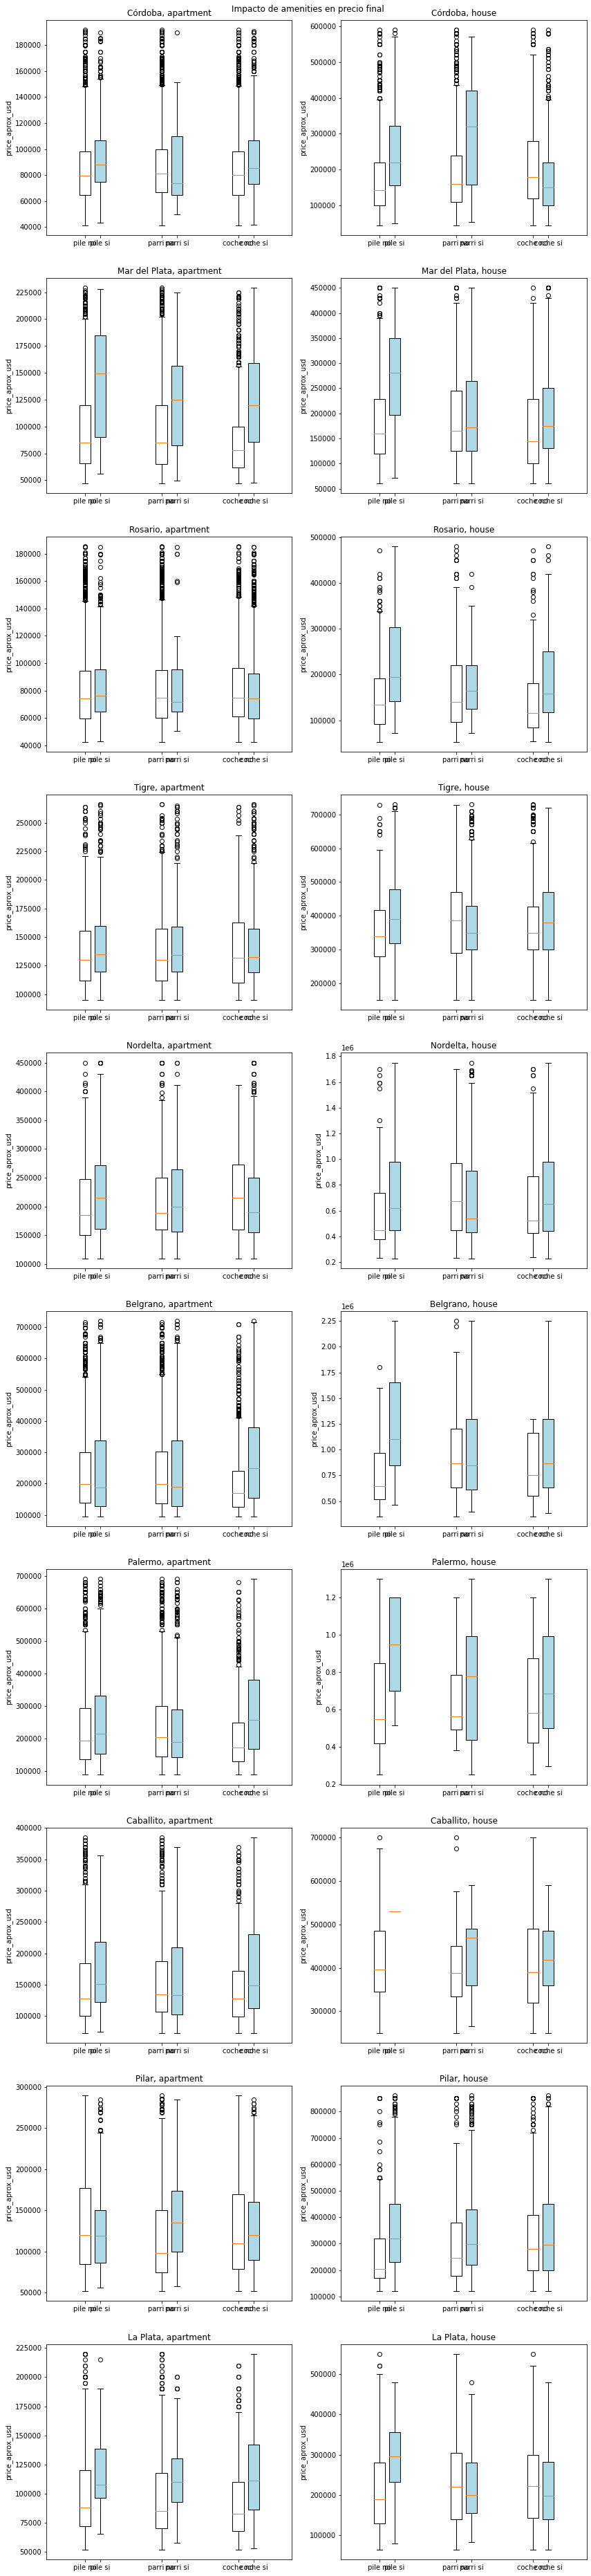

In [67]:
#Vamos a plotear, separando por groupby el data_clean

#levanto el subplot
count_graphs_max=10
len_tipo=len(iterar_tipo)
len_place=min(len(iterar_place),count_graphs_max)

fig, axs = plt.subplots(len_place,len_tipo, figsize=(7*len_tipo,6*len_place), facecolor=(1, 1, 1))



#esto es el titulo
fig.suptitle(t="Impacto de amenities en precio final")

#posicion relativa de los graficos, para que no se vean tan apretados.
fig.subplots_adjust(top=0.975)

#Un "j" para cada tipo
j=0 
for tipo in iterar_tipo:
    
    #Un "i" para cada place
    i=0
    for place in iterar_place:
        if i>=count_graphs_max:
            break
        #reducimos para sacar todo lo que no nos sirve.
        data_reducida = data_clean.loc[:, ['place_name_alt', 'price_aprox_usd', 'surface_covered_in_m2', 'property_type_alt', 
                                           'cochera', 'pileta', 'parrilla']]
        
        #agrupamos la data. filtrando por cada place.
        data_grouped = data_reducida.groupby(by = 'place_name_alt').filter(lambda x: all(x['place_name_alt']==place))

        #volvemos a agrupar la data. filtrando por cada tipo.
        data_grouped = data_grouped.groupby(by = 'property_type_alt').filter(lambda x: all(x['property_type_alt']==tipo))
        
        #aplico el filtro de ouliers para cada grupo
        data_grouped = borrar_outliers(data_grouped, ('price_aprox_usd','surface_covered_in_m2'))
        
        #empieza la parte divertida.
        amenities=['pileta', 'parrilla', 'cochera']
        aux=list(range(0,len(amenities)*2))
        count=0
        
        for amenity in amenities:
            aux[count]=data_grouped[data_grouped[amenity]=='no'].price_aprox_usd
            aux[count+1]=data_grouped[data_grouped[amenity]=='si'].price_aprox_usd
            count+=2

        axs[i,j].boxplot(x=[aux[0], aux[2], aux[4]], 
                       positions=[1,2,3], labels=['pile no', 'parri no', 'coche no'], 
                       patch_artist=True, widths=0.15,boxprops={'facecolor':"white"})

        axs[i,j].boxplot(x=[aux[1], aux[3], aux[5]], 
                       positions=[1.2,2.2,3.2], labels=['pile si', 'parri si', 'coche si'], 
                       patch_artist=True, widths=0.15,boxprops={'facecolor':"lightblue"})


        #seteo las decoraciones para cada axs[i,j]
        axs[i,j].set_title(f'{place}, {tipo}')
#         axs[i,j].set_xlabel(f'surface_covered_in_m2  //  correlacion={corr_grafico}')
        axs[i,j].set_ylabel('price_aprox_usd')

        #vamos al siguiente place. Muevo hacia abajo en el plot
        i+=1
    #vamos a siguiente tipo Muevo hacia la derecha en el plot
    j+=1

#### En los casos en los que el boxplot por categoría difiere, podemos decir que encontramos relación respecto al precio de tener o no ese determinado amenitie. 

### Analisis para Cantidad de ambientes: 

##### Nos proponemos quitar de la descripción la cantidad de ambientes para llenar la variable rooms: 

In [77]:
def regex_to_values(col, reg) :
    u"""Returns a serie with the result of apply the regular expresion to the column
    the serie have a float value only when regular expression search() method found a match
    
    col : column where to apply regular expresion
    reg : regular expresion compiled
    """
    
    serie = col.apply(lambda x : x if x is np.NaN else reg.search(x))
    serie = serie.apply(lambda x : np.NaN if x is np.NaN or x is None else float(x.group(1)))

    return serie

In [78]:
_pattern = '([1-2][0-9]?)(?= amb)'
_express = re.compile(_pattern, flags = re.IGNORECASE)

work = regex_to_values(data['description'], _express)

data_clean['ambientes'] = work

print( "rooms     no nulos", data_clean['rooms'].notnull().sum() )
print( "ambientes no nulos", data_clean['ambientes'].notnull().sum() )
print( "agregar   no nulos", data_clean[data_clean['rooms'].isnull() & data_clean['ambientes'].notnull()].shape[0] )

pd.options.display.max_colwidth = 250 
data_clean[data_clean['ambientes'].notnull()][['rooms', 'ambientes', 'description']]

rooms     no nulos 39579
ambientes no nulos 15326
agregar   no nulos 7293


C:\Users\Jessica\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,rooms,ambientes,description
0,NaN,2.0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CRE..."
2,NaN,2.0,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
11,NaN,1.0,"Entrada de Coche, Jardin, Living en desnivel, Comedor, Cocina, Toillete, 2 Dormitorios con placard, Baño, Payrrom, lavadero, galeria.Independiente DEPTO 1 ambiente con cocina, baño Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web p..."
12,NaN,2.0,"EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENTE CON BALCON A PULMON DE MANZANA.A SOLO MEDIA CUADRA DE LA AV. SANTA FE.LIVING 3,06 X 5,30 DORMITORIO 2,80 X 3,60 BAÑO 1,55 X 2,11 COCINA ..."
60,2.0,2.0,ESPECTACULAR DEPARTAMENTO DE 2 AMBIENTES CON COCHERA PARA INVERSION. EN HERMOSA ZONA DE BELGRANO./NUÑEZ. ZONA MUY TRANQUILA. EL DEPTO ES UN HERMOSO 2 AMBIENTES BIEN DEFINIDOS CON MUY BUENOS DETALLES DE TERMINACION Y BUEN GUSTO. EL DEPTO ESTA UBIC...
...,...,...,...
121067,NaN,2.0,"BOCA - Av. Almte.Brown 800 - 2 amb -. 2do Piso -Muy luminoso- Bajas Exp.Muy buen estadoBaulera en espacio distribuidor : 3,50 x 4 mts (c/pisos cerámicos)Cocina c/lavadero integrado: 4 x 2 mts (pisos cerámicos)Dormitorio: 3 x 3 mts (piso parquet..."
121077,NaN,2.0,"2 ambientes al frente con balcón terraza y cochera fija Muy buen estado. mucha luzHall, living y dormitorio con salida al balcón , baño c/duchaAVISO LEGAL: Las descripciones arquitectónicas y funcionales, valores de expensas, impuestos y servic..."
121120,NaN,2.0,"Monoambiente divididoQuedando un hermoso 2 ambientes Scalabrini entre Gorriti y CabreraCocina incorporada, living/comedor, dormitorio, baño completo y balcón al frenteMuy luminoso2 Aires Split Frio/calorLosa radiante en BañoEdificio con seguridad..."
121138,NaN,2.0,VENTA CON RENTA DEPARTAMENTO DE 2 AMBIENTES A ESTRENAR EN SAAVEDRA - APTO CREDITOExcelente ubicación en zona residencial a metros de Av. Crisólogo Larralde y una cuadra de Av. Dr. Ricardo BalbínMuy buena luminosidad. Amplio living comedor con coc...


Completamos con 7892 casos extra a la variable "rooms"

In [79]:
data_clean['ambientes_final'] = data_clean['rooms']
mask = data_clean['ambientes_final'].isnull() & data_clean['ambientes'].notnull()
data_clean.loc[mask, 'ambientes_final'] = data_clean.loc[mask, 'ambientes']

C:\Users\Jessica\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jessica\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [80]:
corr = data_clean[['price_aprox_usd', 'surface_covered_in_m2', 'rooms', 'ambientes', 'ambientes_final']].corr()
corr.style.background_gradient (cmap = 'coolwarm')

,price_aprox_usd,surface_covered_in_m2,rooms,ambientes,ambientes_final
price_aprox_usd,1.000000,0.165531,0.182916,0.016871,0.199287
surface_covered_in_m2,0.165531,1.000000,0.152554,0.070113,0.157905
rooms,0.182916,0.152554,1.000000,0.280597,1.000000
ambientes,0.016871,0.070113,0.280597,1.000000,0.553599
ambientes_final,0.199287,0.157905,1.000000,0.553599,1.000000


Hacemos una matriz de correlación para observar cómo nos quedan las variables respecto al precio. 

#### Analisis Adicionales 

##### Quitamos solamente outliers de la variable Target y al resto de las variables en caso de tener valores nulos le imputamos la mediana.

In [87]:
#Vamos a plotear, separando por groupby el data_clean

#levanto el subplot

len_tipo=len(iterar_tipo)
len_place=len(iterar_place)
fig, axs = plt.subplots(len_place,len_tipo, figsize=(7*len_tipo,6*len_place), facecolor=(1, 1, 1))

#mapa de colores para que diferenciar por place
color_map=('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22',
            '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
            '#bcbd22', '#17becf')

#esto es el titulo
fig.suptitle(t="Resumen de precios vs superficies. Outliers en 1.5*RSI")

#posicion relativa de los graficos, para que no se vean tan apretados.
fig.subplots_adjust(top=0.975)

#Un "j" para cada tipo
j=0 
for tipo in iterar_tipo:
    
    #Un "j" para cada place
    i=0
    for place in iterar_place:
        #reducimos para sacar todo lo que no nos sirve.
        data_reducida = data_clean.loc[:, ['place_name', 'price_aprox_usd', 'surface_covered_in_m2', 'property_type']]
        
        #agrupamos la data. filtrando por cada place.
        data_grouped = data_reducida.groupby(by = 'place_name').filter(lambda x: all(x['place_name']==place))

        #volvemos a agrupar la data. filtrando por cada tipo.
        data_grouped = data_grouped.groupby(by = 'property_type').filter(lambda x: all(x['property_type']==tipo))
        
        #aplico el filtro de ouliers para cada grupo
        data_grouped_temp = borrar_outliers(data_grouped, ('price_aprox_usd','surface_covered_in_m2'))
        
        #prueba 1
        valor_para_nan = data_grouped_temp['surface_covered_in_m2'].median()
        data_grouped['surface_covered_in_m2'] = data_grouped['surface_covered_in_m2'].fillna(valor_para_nan)
        data_grouped=borrar_outliers(data_grouped, ('price_aprox_usd','surface_covered_in_m2'))
        
#         #probando probando 2
#         print(data_grouped['surface_covered_in_m2'].isnull().sum())
#         data_grouped['surface_covered_in_m2'].fillna(100, inplace=True)
#         print(data_grouped['surface_covered_in_m2'].isnull().sum())
        
        
        
        #calculo corr para meter en el grafico (si, esto no deberia estar aca... sacar, eventualmente)
        corr_grafico =  data_grouped[['surface_covered_in_m2', 'price_aprox_usd']].corr()
        corr_grafico =  corr_grafico.iloc[0,1]
        corr_grafico = round(corr_grafico, 2)

        #seteo las condiciones para cada axs[i,j]
        axs[i,j].set_title(f'{place}, {tipo}')
        axs[i,j].set_xlabel(f'surface_covered_in_m2  //  correlacion={corr_grafico}')
        axs[i,j].set_ylabel('price_aprox_usd')
        axs[i,j].scatter( x=data_grouped['surface_covered_in_m2'], y=data_grouped['price_aprox_usd'], c=color_map[i])

        #vamos al siguiente place. Muevo hacia abajo en el plot
        i+=1
    #vamos a siguiente tipo Muevo hacia la derecha en el plot
    j+=1

IndexError: tuple index out of range

ValueError: Image size of 1008x130032 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1008x130032 with 602 Axes>

#### Queda demostrado graficamente que no nos sirve completar con la mediana porque distorciona mucho las conclusiones. 